# Analysis of Povety in America and the Implications of Race on Proverty Status

## Introduction

Britannica defines poverty as "the state of one who lacks a usual or socially acceptable amount of money or material possessions" causing thme to "lack the means to satisfy their basic needs" (1). While this definition is relatively vague and open to interpretation, especially in regard to what constitues as a basic need, the underlying gist is that a person who lives in poverty cannot pay for food, clean water, clothing, and shelter. While the measure of poverty varies across nations, where in its extreme it's recognized as living on less than $1.90 per day in the USA, the marker for living in poverty is not as low as you may think (2). In fact, roughly 11.6% of the US population lives in poverty (as of January 2021) -- that's 37.9 million Americans (3). 

People generally associate poverty exclusively to income, but that's a tremendous misconcpetion. In reality, poverty can be measured across 3 dimensions: health, education, and standard of living (2). This means when examining poverty, professionals look at child mortality rates and nutrition, school attendance, and electricity, sanitation, and housing, to give a few examples. This means poverty is not only what you can and cannot buy, but likewise an the quality of one's overall human exeperience. 

Poverty can be a difficult topic of study as it's not only difficult to define, but also difficult to generalize. There are many factors to consider when examining poverty rates in the USA. This includes age, gender, immigration status, familial status, ethnicity, geographical location, disability, race, and income, just to name a few examples, and it's increasingly difficult when you take into account that the aformentioned factors are not independent --  in most cases they intersect. While we recognize all the factors mentioned above are important, in this project we will only look at race and income for the sake of being as thorough as we can. 

The purpose of this project is to analyze poverty across America in the context of race. In other words, we're looking to see if there's a trend between poverty status and the race in which one identifies as to see if race is an indicator of poverty and we'll look closely at income in our research. 

Do certain races tend to have higher poverty rates than others? On the flip side, do certain races have have lower rates than others? The goal in asking these questions and making the differentiation based on race is to indubitabily inidentify social and economic inequalities in American society. Certain members of our country endure systematic discrimination on account of their race that keeps them from recieving the same opprotunities and having the same experiences as their counterparts. If there is indeed a correaltion between poverty and race that would mean many Americans are enduring an injustice that they'll like never be able to break away from. And because poverty is a cycle, families will be affected across generations. 

Once we can recognize that these inequalities, and prove so beyond a shadow of a doubt, we can then take steps to rectify the error.

For the purpose of this study we recognize the following 5 races: White, Black, Asian, Native Hawaiian or Pacific Islander, American Indian or Alaska Native, and we'll look at poverty statistics collected by the US government, as far back as 1959 and as recently as 2022, that record these races so that can can make direct generalizations. 

We've collected tables that look at per capita income, poverty rates in regards to the total US population, and poverty status by race which we'll thoroughly analyze to make a confident hypothesis. We'll then use linear regression and machine learning to accept or reject this hypothesis. 

This tutorial will walk you through the entire data science pipeline, which includes the following 5 stages:

1. Data Collection
2. Data Processing 
3. Exploratory Analysis and Data Visualization
4. Analysis, Hypothesis Testing, and Machine Learning
5. Insight and Policy Decision


Sources: 
1. Britannica, T. Editors of Encyclopaedia (2023, April 6). poverty. Encyclopedia Britannica. https://www.britannica.com/topic/poverty
2. https://www.worldvision.ca/stories/child-sponsorship/what-is-poverty
3. https://www.cnbc.com/2023/03/07/why-poverty-might-be-far-worse-in-the-us-than-its-reported.html#:~:text=As%20of%20January%202021%2C%2037.9,the%20United%20States%20Census%20Bureau


Here are the packages we'll need for the tutorial.

In [1]:
import seaborn as sb
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import sklearn.linear_model as slm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Data Collection, Processing, and Cleaning

Our tutorial begins with collecting, processing and cleaning out data. As you can see, we've combined the first 2 stages of the data science pipeline. We've done this because collecting the data and processing it as you go is often the most organized and consistent course of action. Once you have your data, you might as well process and clean it while its right there. This prevents forgetting steps in cleaning data and data loss that can occur when switching back and forth between dataframes.

At this point you're probably wondering why to even bother cleaning data. Here are several reasons why its important: 

- You can present your data in a more human readable form, which allows for easier and more accurate interpretation of data.
- It ensures data is in the correct format to be used later on. For example, making sure dollars are integers or floats so we can perform calculations on them. 
- It makes the data more concise because we can drop columns that are not useful and rows that are incomplete (such as because of null values).
- Going back to add changes when necessary is easier when all the code cleaning is with the table collection because everything is in one place.

The next 3 tables were collected by doing a few google searches and then downloading the tables as csv's and excel sheets. In these formats, it's quick and easy to read the data into a dataframe using pandas. 

This website is immensley helpful for the work we're doing next: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

### Table 1: CPS Population and Per Capita Money Income, All People: 1967 to 2021

The first table was downloaded as a CSV so we can us pandas read_csv to read it into a dataframe. The documentatio to explain how the funciton works is here : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
data1 = pd.read_csv("p01ar.csv", header=6) #header starts in row 6

print(data1.dtypes)

data1.head(7)
# this part constitues as data collection

Year                  object
Number (thousands)    object
Per capita income     object
Unnamed: 3            object
dtype: object


,Year,Number (thousands),Per capita income,Unnamed: 3
0,NaN,NaN,Current\ndollars,2021\ndollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"


Here's what the first 7 rows of the dataframe (data1) look like. Immediately, there are several issues.

- Frist, there are 2 rows of heading which makes the table confusing to read. 'Current\ndollars' and '2021\ndollars are subsets' of Per capita income. They'll need to be combined so there's only 1 row of heading and 4 columns. Then, the extra rows can be dropped. We'll use pandas rename() to rename 'Per capita income' and 'Unnamed 3:' to include 'Current\ndollars' and '2021\ndollars. Then we'll use pandas drop() to drop the first row since it doesn't hold data.

- Next, the 'Year' column has extra values in some of the rows. These values must be removed so that there's only the years represented in that column. We want this because we don't need those values for the purposes of our study and keeping them will complicate graphs we'll make later on. 

- Last, using the dtypes feature of the dataframe, we can see that all the values are object. It would be better is they were all numerical -- whether as integers and floats -- so we can perform caluclations on them later. To do this, we'll first need to remove non-numerical characters from each column using pandas apply() and lambda functions. Then we can use pandas astype() function to change the columns type. Information for this function is found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html.

Making these changes is the beginning of the Data Processing stage for this table


In [3]:
data1 = data1.rename(columns = {"Per capita income": "Current PCI in Dollars", "Unnamed: 3":"2021 PCI in Dollars"}) #rename headers
data1 = data1.drop(index = [0]) # now can drop the first row 
data1.head(7)
#PCI = Per Capita Income


,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"
7,2016,"320,372","33,205","37,490"


In [4]:
data1['Year'] = data1['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years
data1['Number (thousands)'] = data1['Number (thousands)'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['Current PCI in Dollars'] = data1['Current PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['2021 PCI in Dollars'] = data1['2021 PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1 = data1.astype({'Number (thousands)': int, 'Current PCI in Dollars': int, '2021 PCI in Dollars':int, 'Year': int})
print(data1.dtypes)
data1.head(10)
#changed last 3 columns into integers in case calculation is necessary later

Year                      int32
Number (thousands)        int32
Current PCI in Dollars    int32
2021 PCI in Dollars       int32
dtype: object


,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,328722,41285,41285
2,2020,328059,38931,40749
3,2019,325268,39156,41496
4,2018,324356,36080,38929
5,2017,323144,35048,38737
6,2017,323156,34489,38119
7,2016,320372,33205,37490
8,2015,318868,31653,36198
9,2014,316168,30176,34569
10,2013,313443,30027,34980


Notice: changes need to be reassigned to the dataframe, otherwise the change will be lost!

In the segment above, we had to remove ',' from the last 3 columns so that they could be turned into ints. 

### Table 2: People in Poverty by Nativity: 1993 to 2021

This table was downloaded as a excel sheet, so we can read it in using panda's read_excel. Documentatio for this function can be found here: 
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html. 

In [5]:
data2 = pd.read_excel("hstpov16.xlsx", header = 3) #note: 2 levels of headers
data2.head()

,Year,All people,Unnamed: 2,Unnamed: 3,Native,Unnamed: 5,Unnamed: 6,Foreign-born,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,NaN,NaN,Naturalized citizen,NaN,NaN,Not a citizen,NaN,NaN
1,NaN,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty
2,2021,328191,37933,11.6,281383,31083,11,46808,6850,14.6,22874,2428,10.6,23934,4422,18.5
3,2020 (1),327570,37548,11.5,282408,31485,11.1,45162,6063,13.4,22800,2087,9.2,22362,3977,17.8
4,2019,324754,33984,10.5,279867,28342,10.1,44886,5643,12.6,22746,2038,9,22140,3605,16.3


This is dataframe is extremely confusing to look at because of the way the information was organzied. The current header distinguished by people groups, the first row distinguished by citizenship, and the next row labels what information is held in that column.

We're going to do several things.

- Frist, we're going to remove all the columns except the first 4. Evidently, that's a lot of coluns to remove, for simplicity, we'll make a new dataframe and use pandas to extract the 4 four columns from the old dataframe into the new one.

- Next, as we did with the first table, we're going to remove extra values in the year column.

- After, we're going to rename our columns with the table names at row index 1. 

- Lastly, we're going to drop the first 2 rows.

In [6]:
#just want Native groups
dataNew = data2.loc[:32, ["Year","Native","Unnamed: 5", "Unnamed: 6"]]

dataNew['Year'] = dataNew['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years

dataNew = dataNew.rename(columns = {"Native": "Total", "Unnamed: 5":"Number in Poverty", "Unnamed: 6": "Percent in Poverty"}) #rename headers
dataNew = dataNew.drop(index = [0,1])

print(dataNew.dtypes)

dataNew.head(50)

Year                  object
Total                 object
Number in Poverty     object
Percent in Poverty    object
dtype: object


,Year,Total,Number in Poverty,Percent in Poverty
2,2021,281383,31083,11
3,2020,282408,31485,11.1
4,2019,279867,28342,10.1
5,2018,278051,31828,11.4
6,2017,277131,33143,12
7,2017,277158,33095,11.9
8,2016,276089,33999,12.3
9,2015,275398,35973,13.1
10,2014,273628,38871,14.2
11,2013,272423,38831,14.3


Here, we've printed the data types of the remaining columns and once again, they're all objects. Lets change them once again to numerical types so we can perform calculations on them later. 

In [7]:
dataNew = dataNew.astype({'Year':'int', 'Total':int, 'Number in Poverty':int, 'Percent in Poverty':float})
print(dataNew.dtypes)

Year                    int32
Total                   int32
Number in Poverty       int32
Percent in Poverty    float64
dtype: object


### Table 3: Poverty Status of People by Family Relationship, Race, and Hispanic Origin: 1959 to 2021

This table was downloaded as a excel sheet, so we can read it in using panda's read_excel. You can look at the same link above.

In [8]:
data3 = pd.read_excel("hstpov2 .xlsx", header = 4 ) #several headers, first one starts on line 4
print(data3.dtypes)
data3.head()
# Note, population is in thousands!

Year                     object
All people               object
Unnamed: 2               object
Unnamed: 3               object
People in families       object
Unnamed: 5               object
Unnamed: 6               object
Unnamed: 7               object
Unnamed: 8               object
Unnamed: 9               object
Unrelated individuals    object
Unnamed: 11              object
Unnamed: 12              object
dtype: object


,Year,All people,Unnamed: 2,Unnamed: 3,People in families,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unrelated individuals,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,All families,NaN,NaN,"Families with female householder, no spouse pr...",NaN,NaN,NaN,NaN,NaN
1,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN
2,NaN,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent
3,2021,328191,37933,11.6,263764,25077,9.5,48476,12264,25.3,63398,12513,19.7
4,2020 (1),327570,37548,11.5,264437,25232,9.5,48984,12469,25.5,62097,11963,19.3


This table is a mess so we're going to do several things and in this order.

1. Rename columns so they're indicative of the informaiton they hold. Like the previous tables, it looks like the headers are multiple rows so we need to look at the first few rows. We're going to use the same pandas rename() funciton.
2. Drop columns we dont need. We're not distinguishing by family status, so we'll remove the columns pertaining to that. We'll again pandas drop() again. 
3. Create new dataframes so that the information can be seperated by race. You cant tell from the table above, but the excel_sheet we downloaded is composed of several tables. So by using indices and pandas iloc, we can take slices of the dataframe and make a new dataframe out if it. 


Something to note is that we will be including data on Female head of household as we belive there may be some correlation between not only race and poverty, but single mother households and poverty.

In [9]:
data3 = data3.rename(columns = {"All people" : "Total Number", "Unnamed: 2": "Number Below Poverty", 
                                "Unnamed: 3": "Percent Below Poverty", "Unnamed: 7":"Female HoH", "Unnamed: 9": "Percent Female HoH Below Poverty"})
data3 = data3.loc[:, ["Year", "Total Number","Number Below Poverty","Percent Below Poverty", "Female HoH", "Percent Female HoH Below Poverty"]]
data3['Year'] = data3['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years


data3.head()

# not gonna drop first few rows bc affects rest of new dataframes with indices

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty
0,NaN,NaN,NaN,NaN,"Families with female householder, no spouse pr...",NaN
1,NaN,Total,Below poverty,NaN,Total,NaN
2,NaN,NaN,Number,Percent,NaN,Percent
3,2021,328191,37933,11.6,48476,25.3
4,2020,327570,37548,11.5,48984,25.5


Important note: we're not dropping any rows because we're going to 'slice' the dataframe anyway and this would throw off indices we're going to use. 

Next, the first table in the dataframe hold information across all information. We're going to extract just that table and save it in a new dataframe.  

In [10]:
#splitting up data into different tables for each race
dataAllRaces= data3.iloc[3:68,:]
dataAllRaces

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty
3,2021,328191,37933,11.6,48476,25.3
4,2020,327570,37548,11.5,48984,25.5
5,2019,324754,33984,10.5,46255,24.3
6,2018,323847,38146,11.8,46660,26.8
7,2017,322548,39564,12.3,47517,28.5
...,...,...,...,...,...,...
63,1963,187258,36436,19.5,N,47.7
64,1962,184276,38625,21,N,50.3
65,1961,181277,39628,21.9,N,48.1
66,1960,179503,39851,22.2,N,48.9


Now we're going to do the same for each race. We'll extract the correct rows by looking at the indices of the excel sheet and then save them in a new dataframe. 

For these dataframes, we'll also make a new column called 'Race' and added the correct race for each dataframe. After, we'll drop rows that are empty using dropna().


In [11]:
dataWhite = data3.iloc[73:143,:]
dataWhite['Race'] = 'White'
dataWhite= dataWhite.dropna()

dataWhite.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race
73,2021,248909,24919,10,28961,22.7,White
74,2020,249083,25183,10.1,29829,23.4,White
75,2019,248086,22512,9.1,27848,21.6,White
76,2018,247634,24945,10.1,28375,24.6,White
77,2017,247255,26026,10.5,28671,25.8,White


In [12]:
dataBlack = data3.iloc[236:300,:]
dataBlack['Race'] = 'Black'
dataBlack = dataBlack.dropna()
dataBlack.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race
236,2021,43976,8583,19.5,14035,30.8,Black
237,2020,43694,8556,19.6,14082,29.9,Black
238,2019,42965,8073,18.8,13939,29.5,Black
239,2018,42773,8884,20.8,13500,31.7,Black
240,2017,42477,9224,21.7,13986,34.4,Black


In [13]:
dataAsian= data3.iloc[332:374,:]
dataAsian['Race'] = 'Asian/Pacific Islander'
dataAsian = dataAsian.dropna()
dataAsian.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race
332,2021,20676,1922,9.3,1989,15.1,Asian/Pacific Islander
333,2020,20352,1645,8.1,1783,17.4,Asian/Pacific Islander
334,2019,19926,1464,7.3,1576,16.1,Asian/Pacific Islander
335,2018,19768,1996,10.1,1686,19.4,Asian/Pacific Islander
336,2017,19526,1891,9.7,1715,16.8,Asian/Pacific Islander


In [14]:
dataNA= data3.iloc[406:448,:]
dataNA['Race'] = 'American Indian/AN' #Native American, Alaska Native
dataNA = dataNA.dropna()
dataNA.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race
406,2021,4109,998,24.3,999,43.5,American Indian/AN
407,2020,3950,791,20,877,34.6,American Indian/AN
408,2019,3735,677,18.1,701,33,American Indian/AN
409,2018,3663,808,22.1,828,28.1,American Indian/AN
410,2017,3616,790,21.8,888,33.7,American Indian/AN


In [15]:
dataHispanic = data3.iloc[480:532,:] 
dataHispanic['Race'] = 'Hispanic'
dataHispanic = dataHispanic.dropna()
dataHispanic.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race
480,2021,62482,10690,17.1,12382,30.3,Hispanic
481,2020,61769,10520,17,12856,30.1,Hispanic
482,2019,60602,9545,15.7,12248,28.7,Hispanic
483,2018,59957,10526,17.6,11939,31.1,Hispanic
484,2017,59051,10816,18.3,12155,35.2,Hispanic


Hispanic is not technically a race but we'll take note of it.

Now, we're going to add all the dataframe together. We'll use pandas concat() to basically stack all the dataframes. We want this because having all the data in one table makes it easier to use.

We're also going to change column types so graphing later on is easier

In [16]:
# combining all the DFs
finalDF = pd.concat([ dataHispanic ,dataWhite , dataAsian , dataBlack, dataNA], ignore_index=True, axis=0)
finalDF['Percent Below Poverty'] = finalDF['Percent Below Poverty'].apply(lambda item: float(item))
finalDF['Percent Female HoH Below Poverty'] = finalDF['Percent Female HoH Below Poverty'].astype(float)
finalDF['Percent Female HoH'] = (finalDF['Female HoH'].astype(int) / finalDF['Total Number']) * 100
finalDF

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race,Percent Female HoH
0,2021,62482,10690,17.1,12382,30.3,Hispanic,19.816907
1,2020,61769,10520,17.0,12856,30.1,Hispanic,20.813029
2,2019,60602,9545,15.7,12248,28.7,Hispanic,20.210554
3,2018,59957,10526,17.6,11939,31.1,Hispanic,19.912604
4,2017,59051,10816,18.3,12155,35.2,Hispanic,20.583902
...,...,...,...,...,...,...,...,...
235,1991,1793,562,31.3,347,59.6,American Indian/AN,19.35304
236,1990,1560,444,28.5,334,54.1,American Indian/AN,21.410256
237,1989,1445,345,23.9,269,56.5,American Indian/AN,18.615917
238,1988,1454,440,30.2,269,42.9,American Indian/AN,18.500688


Now all the data is together and has a column that'll allow us to track race and poverty across years.

### Table 4: Poverty Rate by Race and Ethnicity

This table was also downloaded as a CSV, so we can again use pandas read_csv

In [17]:
povByRace = pd.read_csv("povRace.csv", header=2)
povByRace.head(20)

,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total,Footnotes
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128,1.0
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160,NaN
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110,NaN
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129,NaN
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164,NaN
5,California,0.090,0.194,0.152,0.101,0.225,0.117,0.123,NaN
6,Colorado,0.077,0.177,0.148,0.082,0.156,0.116,0.099,NaN
7,Connecticut,0.068,0.145,0.196,0.080,NaN,0.101,0.101,NaN
8,Delaware,0.073,0.170,0.202,0.072,NaN,0.180,0.112,NaN
9,District of Columbia,0.050,0.280,0.090,0.174,NaN,0.158,0.165,NaN


Here we can see that the 'Footnotes` column is totally empty, so lets remove that.

But more complicatedly, there a empty values across other rows and columns -- for now we'll leave them as is

In [18]:
povByRace = povByRace.drop(columns = {"Footnotes"}) #dont need
povByRace.head()

,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164


In [19]:
print(povByRace.dtypes) 
# want to double check the datatypes of each column are appropriate for the data they hold so they can be best used later

Location                                       object
White                                         float64
Black                                         float64
Hispanic                                      float64
Asian/Native Hawaiian and Pacific Islander    float64
American Indian/Alaska Native                 float64
Multiple Races                                float64
Total                                         float64
dtype: object


These types are acceptable

### Table 5 : Median Household Income by Race

This next table we're going to perform webscrapping to obtain. Here's how the process works:

1. store the URL of the webpage that stores the desired table.
2. Use pythons requests packages get() function to send a GET request to the specified url. Here's a website that explains how the function works well : https://www.w3schools.com/python/ref_requests_get.asp. 
3. Use pythons BeautifulSoup package to parse the website. Then we can use prettify() the read through the webpage's html code and see where our table begins. We've commented it out as the result is very long and tedious to scroll through. 
4. use findall() to get the table and then read_html to read the table into a dataframe. Notice the result of read_html is an array -- we want the first element. 


Here's a webpage that has examples of the entire process : https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/.

In [20]:
url = 'https://www.pgpf.org/blog/2023/02/income-and-wealth-in-the-united-states-an-overview-of-recent-data'

medByRace = requests.get(url)

soup1 = BeautifulSoup(medByRace.content, 'html.parser')
# print(soup1.prettify())

table1 = soup1.findAll('table')

tables = pd.read_html(str(table1))
df = tables[0]
df

,Region,2020 Median Household Income (2021 dollars),2021 Median Household Income
0,United States,"$71,186","$70,784"
1,Northeast,"$79,032","$77,472"
2,West,"$78,755","$79,430"
3,Midwest,"$70,528","$71,129"
4,South,"$64,355","$63,368"


Do we want to use SQL anywhere????????

## Exploratory Analysis and Data Visualization

Now that the data is clean and human readable, we can try to analyze and visualize it.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 

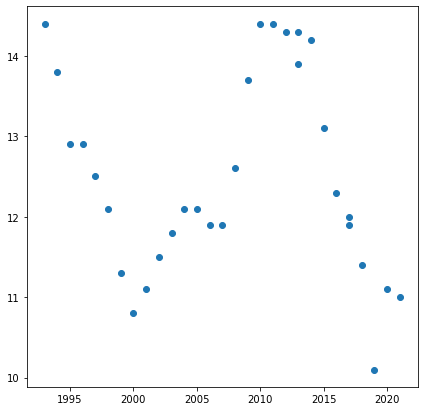

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter( x= dataNew['Year'], y =dataNew['Percent in Poverty'])

When creating the graph, 'Race' is the independent variable and 'Perent Below Poverty' is the dependet variable. Aka Percent Below Poverty Vs. Race

For better visualization they are distinguishable by color, which was done using a dictionary that stored race (key) and colors (value).

The make the table, we first used pandas groupby() to make groups by race. Then we iterated through these groups to print the rows according to their key (race) so that they have the right color. 

We used matplotlib plot() to make a scatter plot of the data. Documentation can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 

x is set to 'Race' and y to 'Percent Below Poverty'.

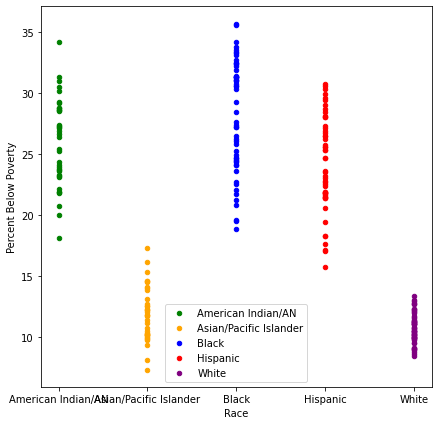

In [22]:
colors = {"American Indian/AN" : "green", "Hispanic" : "red", "Black" : "blue", "White": "purple" , "Asian/Pacific Islander" : "orange"}

fig, ax = plt.subplots(figsize=(7, 7))
groupedDF = finalDF.groupby(['Race'])
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Race', label=key,color=colors[key])

plt.xlabel('Race')
plt.ylabel('Percent Below Poverty')
plt.show()

Here, you can see that certain races have higher 'Percent Below Poverty' points than others and in higher numbers. In other words, certain races have higher poverty rates and in higher amounts. 

Next, we're going to make a plot that shows Percent Below Poverty vs. Year, but we'll keep our color coding so we can distinguish by race.

To do this, we kept our grouping from the previous plot, but made a new plot and changed 'x' to 'Year'.

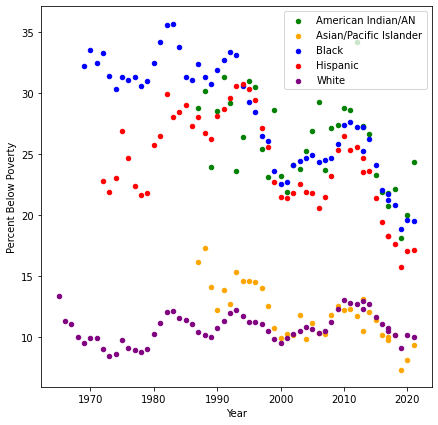

In [23]:
fig, ax = plt.subplots(figsize=(7, 7))
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()

This graph once again indicated that poverty rates are higher for certain races than for others, but also now shows that since 1960, poverty rates  -- although fluctuating -- across the board have been steadily been decreasing.

The following graph illustratrs that despite the decrease in pverty generally over time, generally, Hispanic, Black, and Native American people are more likely to experiecne poverty. The lines also are prediction lines that illustrate predicted percentage below poverty every year based on their race.

American Indian/AN:[343.4226586],[[-0.15840149]]
Asian/Pacific Islander:[336.60689782],[[-0.16201369]]
Black:[525.74970826],[[-0.24937306]]
Hispanic:[296.99674322],[[-0.13658207]]
White:[-33.33509618],[[0.02210022]]


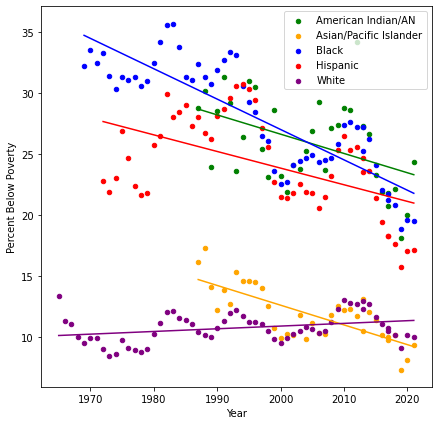

   Year Total Number Number Below Poverty  Percent Below Poverty Female HoH  \
0  2021        62482                10690                   17.1      12382   
1  2020        61769                10520                   17.0      12856   
2  2019        60602                 9545                   15.7      12248   
3  2018        59957                10526                   17.6      11939   
4  2017        59051                10816                   18.3      12155   

   Percent Female HoH Below Poverty      Race Percent Female HoH Prediction  
0                              30.3  Hispanic          19.816907             
1                              30.1  Hispanic          20.813029             
2                              28.7  Hispanic          20.210554             
3                              31.1  Hispanic          19.912604             
4                              35.2  Hispanic          20.583902             


In [24]:
finalDF['Prediction'] = " "
groupedDF = finalDF.groupby(['Race'])
fig, ax = plt.subplots(figsize=(7, 7))
predictions = {"Year":[], "American Indian/AN" : [], "Hispanic" : [], "Black" :[], "White": [] , "Asian/Pacific Islander" : []}
predictionsF = {"Year":[], "American Indian/AN" : [], "Hispanic" : [], "Black" :[], "White": [] , "Asian/Pacific Islander" : []}
for key, group in groupedDF :
    group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])
    x = group['Year'].to_numpy().reshape(-1,1) #saving as valye bc will be using
    reg = LinearRegression().fit(x, group['Percent Below Poverty'].to_numpy().reshape(-1,1))
    regF = LinearRegression().fit(x, group['Percent Female HoH Below Poverty'].to_numpy().reshape(-1,1))
    race_y_pred = reg.predict(x) #using regression to predict values of y given values of x (can compare this prediction to actual)
    race_yF_pred = regF.predict(x)
    predictions [key].append(race_y_pred) 
    predictions['Year'] = x.astype(int)
    predictionsF[key].append(race_yF_pred)
    predictionsF['Year'] = x.astype(int)
    plt.plot(x,race_y_pred, color = colors[key],  label = str(key) +  " RL")
    print(key +":" + str(reg.intercept_) + "," + str(reg.coef_)) #save for later

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()


# how to plot predicted values for each group?
print(finalDF.head())

Now, we're going to use statsmodels ols() function to get a linear regression of Percent Below Poverty ~ Race (essentially, PBP vs Race) and then summer() to print out the results. We're doing this to get a numerical representation of the relationships between Race and PBP to see if race is a statistically significant predictor of poverty. 

More information on these functions can be found here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 

In [25]:
res = smf.ols(formula= "Q(\"Percent Below Poverty\") ~ Race", data=finalDF).fit()
print(res.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("Percent Below Poverty")   R-squared:                       0.835
Model:                                    OLS   Adj. R-squared:                  0.832
Method:                         Least Squares   F-statistic:                     297.5
Date:                        Thu, 11 May 2023   Prob (F-statistic):           1.06e-90
Time:                                20:30:56   Log-Likelihood:                -627.90
No. Observations:                         240   AIC:                             1266.
Df Residuals:                             235   BIC:                             1283.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Considering that the probablity of the F-statistic (p-value) is close to 0, except for Hispanic, the null hypothesis of no relationship between race and percent below poverty is less likely to be valid. Therefore, we should utilize the predictions previously calculated to find how race correlates with the amount of percent below poverty each year.

Next, we will go back to those predicted values and make a data frame out of them.

We will include predictions of Percent below poverty and percent below poverty under households headed solely by women.

In [26]:
predicts = pd.DataFrame(map(np.ravel, predictions.values()), index=predictions.keys()).T
predictsF = pd.DataFrame(map(np.ravel, predictionsF.values()), index=predictionsF.keys()).T


newPredicts = pd.DataFrame({"Prediction" : pd.concat([predicts["Hispanic"].loc[0:51], predicts["White"], 
                predicts["Asian/Pacific Islander"].loc[0:36], predicts["Black"].loc[0:58], predicts["American Indian/AN"].loc[0:36]], ignore_index=True),
                            "Prediction Female HoH":pd.concat([predictsF["Hispanic"].loc[0:51], predictsF["White"], 
                predictsF["Asian/Pacific Islander"].loc[0:36], predictsF["Black"].loc[0:58], predictsF["American Indian/AN"].loc[0:36]], ignore_index=True)})
newPredicts["Race"] = ""
newPredicts["Race"].loc[0:51] = "Hispanic"
newPredicts["Race"].loc[52:116] = "White"
newPredicts["Race"].loc[117:153] = "Asian/Pacific Islander"
newPredicts["Race"].loc[154:212] = "Black"
newPredicts["Race"].loc[213:] = "American Indian/AN"

newPredicts["Year"] = finalDF["Year"]

# newPredicts = newPredicts.iloc[::-1]

newPredicts

,Prediction,Prediction Female HoH,Race,Year
0,20.964384,33.145018,Hispanic,2021
1,21.100966,33.696399,Hispanic,2020
2,21.237548,34.247781,Hispanic,2019
3,21.374130,34.799162,Hispanic,2018
4,21.510713,35.350544,Hispanic,2017
...,...,...,...,...
239,28.045296,48.819757,American Indian/AN,1987
240,28.203697,49.220813,American Indian/AN,NaN
241,28.362099,49.621868,American Indian/AN,NaN
242,28.520500,50.022924,American Indian/AN,NaN


To have all the informaiton in one place, we'll add our predictions to our original df.

In [27]:
finalDF["Prediction"] = newPredicts["Prediction"].astype(float)
finalDF

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race,Percent Female HoH,Prediction
0,2021,62482,10690,17.1,12382,30.3,Hispanic,19.816907,20.964384
1,2020,61769,10520,17.0,12856,30.1,Hispanic,20.813029,21.100966
2,2019,60602,9545,15.7,12248,28.7,Hispanic,20.210554,21.237548
3,2018,59957,10526,17.6,11939,31.1,Hispanic,19.912604,21.374130
4,2017,59051,10816,18.3,12155,35.2,Hispanic,20.583902,21.510713
...,...,...,...,...,...,...,...,...,...
235,1991,1793,562,31.3,347,59.6,American Indian/AN,19.35304,27.411690
236,1990,1560,444,28.5,334,54.1,American Indian/AN,21.410256,27.570091
237,1989,1445,345,23.9,269,56.5,American Indian/AN,18.615917,27.728493
238,1988,1454,440,30.2,269,42.9,American Indian/AN,18.500688,27.886894


To visually guage the accuracy of the predictons made from the linear regression, we'll create a violin plot of the residuals. We'll use pythons seaborn package. Here's a detailed descriptions of seaborns violinplot() functions: https://seaborn.pydata.org/generated/seaborn.violinplot.html. 

We've started by creating the plot. Then we set the style and used ols's resid attribute to obtain the residuals of the linear regression. Then we used violinplot() to creat the plot with Race as x and Residuals as y.

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Female HoH,Percent Female HoH Below Poverty,Race,Percent Female HoH,Prediction,Residuals
0,2021,62482,10690,17.1,12382,30.3,Hispanic,19.816907,20.964384,-7.113462
1,2020,61769,10520,17.0,12856,30.1,Hispanic,20.813029,21.100966,-7.213462
2,2019,60602,9545,15.7,12248,28.7,Hispanic,20.210554,21.237548,-8.513462
3,2018,59957,10526,17.6,11939,31.1,Hispanic,19.912604,21.374130,-6.613462
4,2017,59051,10816,18.3,12155,35.2,Hispanic,20.583902,21.510713,-5.913462
...,...,...,...,...,...,...,...,...,...,...
235,1991,1793,562,31.3,347,59.6,American Indian/AN,19.35304,27.411690,5.408108
236,1990,1560,444,28.5,334,54.1,American Indian/AN,21.410256,27.570091,2.608108
237,1989,1445,345,23.9,269,56.5,American Indian/AN,18.615917,27.728493,-1.991892
238,1988,1454,440,30.2,269,42.9,American Indian/AN,18.500688,27.886894,4.308108


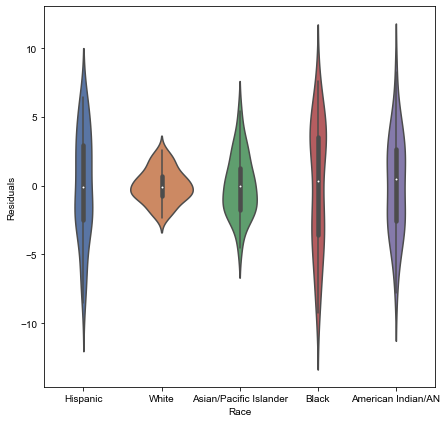

In [28]:
fig, ax = plt.subplots(figsize=(7,7))
sb.set(style = 'whitegrid') 
finalDF['Residuals'] = res.resid
sb.violinplot( data = finalDF, x= 'Race', y='Residuals') 
plt.xlabel('Race')
plt.ylabel('Residuals')
finalDF

The results are consistent with what the residuals of a linea regression should look like. 
-  A median close to 0
- Majority participation about the mean 
- Small range, with lower participation near extremes
- Unimodal distribution 

[Text(0.5, 1.0, 'Residuals vs Fitted Values Model')]

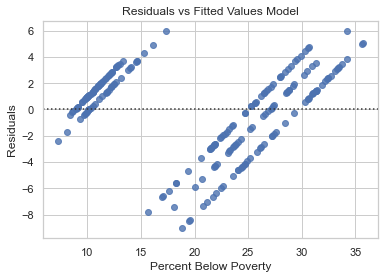

In [29]:
# Residual plot for the fitted values
sb.residplot(data=finalDF, x= "Percent Below Poverty", y="Residuals").set(title="Residuals vs Fitted Values Model")

Before we start implementing machine learning to better understand the data, we need a couple of pieces of data.
First we need to standardize percent below poverty. This is the formula we will use:

([Percent Below Poverty] - mean[Percent Below Poverty]) / standard_deviation[Percent Below Poverty]

Source: https://en.wikipedia.org/wiki/Standard_score

Then we will train on 95% of the data and drop the extra 5% since we are working with a standardized dataset, we will be working with the 95% confidence interval.

Finally we will fit the regression model of the standarized data of Percent Below Poverty and see its relationhship to race and how that interacts with the perecntage of female HoH Below Poverty.

In [30]:
mean = finalDF["Percent Below Poverty"].mean()
std = finalDF["Percent Below Poverty"].std()

finalDF["Percent_Below_Poverty_std"] = (finalDF["Percent Below Poverty"] - mean) / std   

final_train = finalDF.sample(frac=0.95)
final_test = finalDF.drop(final_train.index)

newRes = smf.ols(formula="Percent_Below_Poverty_std ~ Race + Q(\"Percent Female HoH Below Poverty\")", data=final_train).fit()
print(newRes.summary())

                                OLS Regression Results                               
Dep. Variable:     Percent_Below_Poverty_std   R-squared:                       0.949
Model:                                   OLS   Adj. R-squared:                  0.948
Method:                        Least Squares   F-statistic:                     825.2
Date:                       Thu, 11 May 2023   Prob (F-statistic):          3.24e-141
Time:                               20:30:57   Log-Likelihood:                 14.673
No. Observations:                        228   AIC:                            -17.35
Df Residuals:                            222   BIC:                             3.231
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

__Machine Learning__

Compare machine learning model results to previous model results

First we will run our data through a gradient descent algorithm.

Gradient descent in machine learning is an optimization algorithm whic uses training data to learn over time and devlop things like neural networks. More information ont his powerful AI tool can be found here: [IBM Source](https://www.ibm.com/topics/gradient-descent#:~:text=Gradient%20descent%20is%20an%20optimization,each%20iteration%20of%20parameter%20updates)

In [31]:
y = final_test["Percent_Below_Poverty_std"].to_numpy()
X = sm.add_constant(final_test[['Percent Below Poverty', 'Percent Female HoH Below Poverty']].to_numpy())

gradientRegress = slm.SGDRegressor(eta0=0.00001).fit(X,y)

gradientTheta = gradientRegress.coef_

In [32]:
final = final_test[['Race','Percent Below Poverty', 'Percent Female HoH Below Poverty', 'Percent_Below_Poverty_std', 'Prediction']].copy().reset_index(drop=True)


final['Gradient Prediction'] = (pd.Series([gradientTheta.dot(row) for row in X]) * std) + mean

final['Model Miss'] = abs(final['Prediction'] - final['Percent Below Poverty'])
final['Gradient Miss'] = abs(final['Gradient Prediction'] - final['Percent Below Poverty'])

final

,Race,Percent Below Poverty,Percent Female HoH Below Poverty,Percent_Below_Poverty_std,Prediction,Gradient Prediction,Model Miss,Gradient Miss
0,Hispanic,30.3,52.8,1.244443,24.515518,24.998778,5.784482,5.301222
1,Hispanic,22.8,53.5,0.326524,27.656906,24.703259,4.856906,1.903259
2,White,12.1,31.2,-0.983040,10.489635,22.743649,1.610365,10.643649
3,Asian/Pacific Islander,11.8,23.6,-1.019757,12.093481,22.228285,0.293481,10.428285
4,Black,27.4,41.0,0.889514,24.509857,24.087695,2.890143,3.312305
5,Black,24.5,39.7,0.534586,25.257976,23.869745,0.757976,0.630255
6,Black,28.4,46.4,1.011903,28.001080,24.489727,0.398920,3.910273
7,Black,31.4,56.5,1.379071,33.736660,25.293144,2.336660,6.106856
8,American Indian/AN,18.1,33.0,-0.248705,NaN,23.135853,NaN,5.035853
9,American Indian/AN,22.1,28.1,0.240852,NaN,22.994647,NaN,0.894647


In [33]:
print("Model Miss Mean: ",  final["Model Miss"].mean())
print("Gradient Miss Mean: ",  final["Gradient Miss"].mean())

Model Miss Mean:  2.3595327505865713
Gradient Miss Mean:  4.416172769161919


The present data above illustrates a low chance that our model was innacurate. Our previous predictions and gradient result have a relatively low miss rate. There is still a chance the lack of data input may also be at play here, but the results demonstrate that the previously assumed relationship between not only poverty and race but also poverty race and it's interaction with pecent female head of household below poverty was correlary.

The following graph visuallizes the relationship between Percent below poverty and percent female head of household grouped by race.

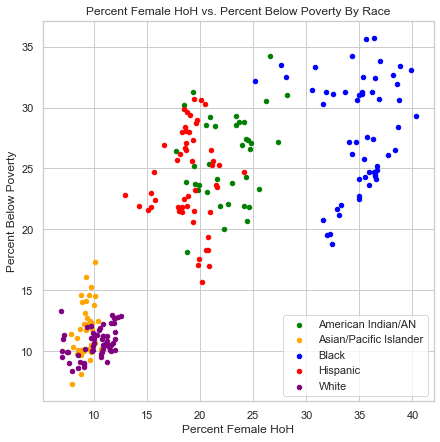

In [34]:
# newRes = smf.ols(formula= "Q(\"Percent Below Poverty\") ~ Race * Q(\"Percent Female HoH Below Poverty\")", data=finalDF).fit()
# print(newRes.summary())

groupedDF = finalDF.groupby(['Race'])
gf = finalDF.groupby(['Race'])
fig, ax = plt.subplots(figsize=(7, 7))
for key, group in gf :
    group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Percent Female HoH', label=key,color=colors[key])
    # x = group['Percent Female HoH'].to_numpy().reshape(-1,1) #saving as valye bc will be using
    # reg = LinearRegression().fit(x, group['Percent Below Poverty'].to_numpy().reshape(-1,1))
    # race_y_pred = reg.predict(x) #using regression to predict values of y given values of x (can compare this prediction to actual)
    # plt.plot(x,race_y_pred, color = colors[key],  label = str(key) +  " RL")
    # print(key +":" + str(reg.intercept_) + "," + str(reg.coef_)) #save for later

# plt.xlabel('Year')
# plt.ylabel('Percent Below Poverty')
plt.title('Percent Female HoH vs. Percent Below Poverty By Race')
plt.show()

Text(0, 0.5, 'Residuals for Predicted')

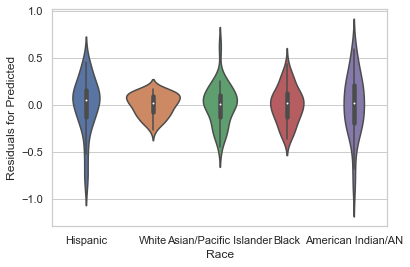

In [35]:
finalDF["Residuals for Predicted"] = newRes.resid

sb.violinplot( data = finalDF, x= 'Race', y='Residuals for Predicted') 
plt.xlabel('Race')
plt.ylabel('Residuals for Predicted')

[Text(0.5, 1.0, 'Residuals for Predicted vs Fitted Values Model')]

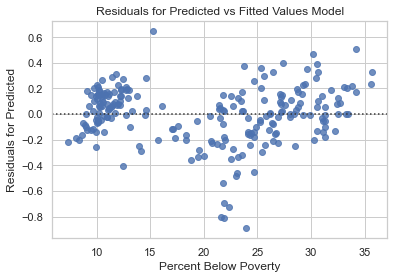

In [36]:
sb.residplot(data=finalDF, x= "Percent Below Poverty", y="Residuals for Predicted").set(title="Residuals for Predicted vs Fitted Values Model")

# Table 6: Race and Hispanic Origin of People by Mean Income and Sex: 1947 to 2021

In [37]:
data6 = pd.read_excel("p03.xlsx", header = 9 ) #several headers, first one starts on line 4
print(data6.dtypes)
data6.head()

Unnamed: 0            object
Unnamed: 1            object
Current\ndollars      object
2021\ndollars         object
Unnamed: 4            object
Current\ndollars.1    object
2021\ndollars.1       object
dtype: object


,Unnamed: 0,Unnamed: 1,Current\ndollars,2021\ndollars,Unnamed: 4,Current\ndollars.1,2021\ndollars.1
0,2021,118237,68592,68592,119263,45792,45792
1,2020 (41),117931,64929,67961,118426,43188,45204
2,2019,116561,65144,69037,118731,43315,45903
3,2018,115219,61180,66011,116920,39803,42946
4,2017 (40),114737,59735,66023,116468,38395,42437


In [38]:
data6 = data6.rename(columns={"Unnamed: 0": "Year", "2021\ndollars": "Male_Income", "2021\ndollars.1": "Female_Income", "Unnamed: 1": "Amount_With_Income"})
data6 = data6.loc[:, ["Year", "Male_Income", "Female_Income","Amount_With_Income"]]
data6.head()

,Year,Male_Income,Female_Income,Amount_With_Income
0,2021,68592,45792,118237
1,2020 (41),67961,45204,117931
2,2019,69037,45903,116561
3,2018,66011,42946,115219
4,2017 (40),66023,42437,114737


Concetrate on data for each race. Use melt to tidy up data.

In [39]:
dWhite = data6.iloc[81:161,:]
dWhite['Race'] = 'White'
dWhite= dWhite.dropna()
dWhite = pd.melt(dWhite, id_vars=["Year", "Race", "Amount_With_Income"], value_vars=["Male_Income", "Female_Income"], value_name="Income", var_name="Gender")

dWhite

,Year,Race,Amount_With_Income,Gender,Income
0,2021,White,93506,Male_Income,71091
1,2020 (41),White,93391,Male_Income,70345
2,2019,White,92667,Male_Income,71630
3,2018,White,91817,Male_Income,68622
4,2017 (40),White,91559,Male_Income,68764
...,...,...,...,...,...
137,1957,White,47833,Female_Income,15123
138,1956,White,47038,Female_Income,15253
139,1955,White,46586,Female_Income,15038
140,1954,White,45019,Female_Income,14654


In [40]:
dBlack = data6.iloc[251:331,:]
dBlack['Race'] = 'Black'
dBlack= dBlack.dropna()
dBlack = pd.melt(dBlack, id_vars=["Year", "Race", "Amount_With_Income"], value_vars=["Male_Income", "Female_Income"], value_name="Income", var_name="Gender")

dBlack

,Year,Race,Amount_With_Income,Gender,Income
0,2021,Black,13631,Male_Income,47797
1,2020 (41),Black,13606,Male_Income,47498
2,2019,Black,13164,Male_Income,47799
3,2018,Black,12932,Male_Income,44612
4,2017 (40),Black,12876,Male_Income,44865
...,...,...,...,...,...
137,1957,Black,5044,Female_Income,9147
138,1956,Black,4978,Female_Income,9202
139,1955,Black,4860,Female_Income,8326
140,1954,Black,4693,Female_Income,8660


In [41]:
dAsian = data6.iloc[361:401,:]
dAsian['Race'] = 'Asian'
dAsian= dAsian.dropna()
dAsian = pd.melt(dAsian, id_vars=["Year", "Race", "Amount_With_Income"], value_vars=["Male_Income", "Female_Income"], value_name="Income", var_name="Gender")

dAsian

,Year,Race,Amount_With_Income,Gender,Income
0,2021,Asian,7255,Male_Income,85632
1,2020 (41),Asian,7013,Male_Income,84606
2,2019,Asian,7010,Male_Income,85167
3,2018,Asian,6847,Male_Income,81913
4,2017 (40),Asian,6771,Male_Income,79527
...,...,...,...,...,...
67,1992 (22),Asian,2558,Female_Income,32469
68,1991,Asian,2358,Female_Income,31101
69,1990,Asian,2235,Female_Income,31581
70,1989,Asian,2112,Female_Income,33295


In [42]:
dHispanic = data6.iloc[405:455,:]
dHispanic['Race'] = 'Hispanic'
dHispanic= dHispanic.dropna()
dHispanic = pd.melt(dHispanic, id_vars=["Year", "Race", "Amount_With_Income"], value_vars=["Male_Income", "Female_Income"], value_name="Income", var_name="Gender")

dHispanic

,Year,Race,Amount_With_Income,Gender,Income
0,2021,Hispanic,20158,Male_Income,48461
1,2020 (41),Hispanic,19935,Male_Income,46415
2,2019,Hispanic,19352,Male_Income,46944
3,2018,Hispanic,18981,Male_Income,45613
4,2017 (40),Hispanic,18544,Male_Income,44573
...,...,...,...,...,...
95,1978,Hispanic,3447,Female_Income,18337
96,1977,Hispanic,3376,Female_Income,18329
97,1976 (17),Hispanic,3099,Female_Income,17753
98,1975 (16),Hispanic,2945,Female_Income,17438


Combine the data from each race into one dataframe

In [43]:
incData = pd.concat([ dHispanic ,dWhite , dAsian , dBlack], ignore_index=True, axis=0)
incData["Year"] = [year[0:4] for year in incData["Year"].astype(str)]
incData["Year"] = incData["Year"].astype(int)
incData["Income"] = incData["Income"].astype(int)
incData

,Year,Race,Amount_With_Income,Gender,Income
0,2021,Hispanic,20158,Male_Income,48461
1,2020,Hispanic,19935,Male_Income,46415
2,2019,Hispanic,19352,Male_Income,46944
3,2018,Hispanic,18981,Male_Income,45613
4,2017,Hispanic,18544,Male_Income,44573
...,...,...,...,...,...
451,1957,Black,5044,Female_Income,9147
452,1956,Black,4978,Female_Income,9202
453,1955,Black,4860,Female_Income,8326
454,1954,Black,4693,Female_Income,8660


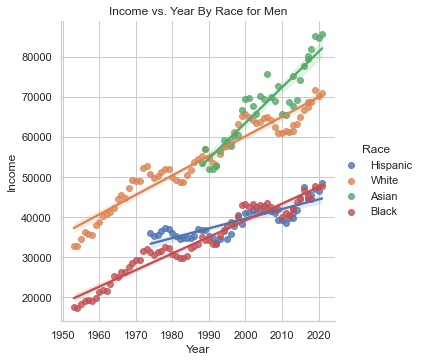

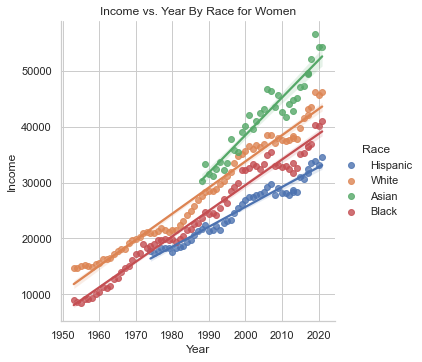

In [44]:
colors = {"Hispanic" : "red", "Black" : "blue", "White": "purple" , "Asian" : "orange"}

groupIncMen = incData.loc[incData["Gender"] == "Male_Income"]
sb.lmplot(x='Year', y='Income', data=groupIncMen, hue='Race', fit_reg=True, scatter=True).set(title='Income vs. Year By Race for Men')


groupIncWomen = incData.loc[incData["Gender"] == "Female_Income"]
sb.lmplot(x='Year', y='Income', data=groupIncWomen, hue='Race', fit_reg=True, scatter=True).set(title='Income vs. Year By Race for Women')


There is something interesting to note about the data above. When accounting for gender, Black and hispanic men tend to do far worse than people of white or asian descent, however that distance is much narrower among women. This may suggest a shared experience between women that lead to them more often than not being treated more similarly across races compared to men. Women still maintain that Black and Hispanic people earn less and overall their earnings tend to be less then men, but that gap is a lot narrower than the one among men.

Why might this be?

Historically women have always seen some level of a wage gap. While it has narrowed over time, it still continues to persist in our society. According to the Center for American Progress, in 2020, white women earned 79 cents for every dollar a white man made. Black and Hispanic women made over 10 cents less than white women, illustrating how Race and Gender may be an inhibiting factor to one's income level. One piece of data persists though. Asian women tended to around the level or more income than their white male counterparts. We will discuss the socioeconomic implications of this data later on. [Source](https://www.americanprogress.org/article/women-of-color-and-the-wage-gap/)

In [63]:
incRes = smf.ols(formula='Income ~ Race * Gender', data=incData).fit()
print(incRes.summary())

incData["Residuals"] = incRes.resid

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     162.0
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.83e-118
Time:                        20:46:53   Log-Likelihood:                -4769.6
No. Observations:                 456   AIC:                             9555.
Df Residuals:                     448   BIC:                             9588.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

All of the probabilites of the f-statistic are less than 5% implying that the null hypothesis of no relation between Income and the interaction between Race and Gender is likely to be the case. The r-squared value indicates that almost 71.1% of the level of income can be explained by Race and Gender indicating there being  a strong correlation between these 3 variables. This supports our previous expectation that throughout the years, one's gender and race correlate with their income. The average white male will make far more than the average hispanic male. The average male will see more income than women for every race indicated in the data.

[Text(0.5, 1.0, 'Income by Race for Men')]

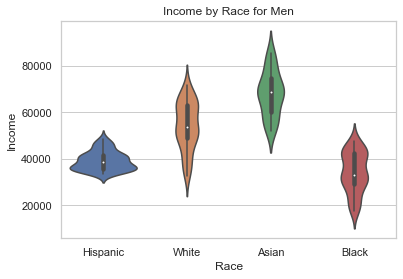

In [46]:
sb.violinplot(data=groupIncMen, x="Race", y="Income").set(title="Income by Race for Men")

[Text(0.5, 1.0, 'Income by Race for Women')]

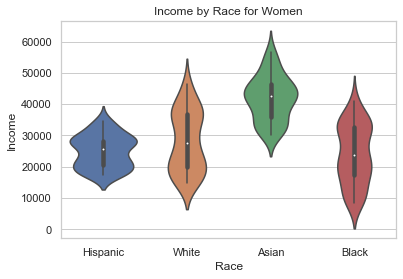

In [47]:
sb.violinplot(data=groupIncWomen, x="Race", y="Income").set(title="Income by Race for Women")

Based off The last 2 violin plots, barring Hispanic, Men tend to have less concentration around the means across the races as apposed to women who's data is more conectrated around the median. This indicates a higher level of variation of income among men within their respective races as apposed to women.

So not only do men have more variation in income between races, but also within each race subset. 

Some things to note:
- Asian women outperform Black men and slightly outperform Hispanic men
- White men out perform every single category except for Asian men

What may the socioeconomic factors be that lead to these outcomes of racial inequity?

A case study we can observe would be the black population in America. Historically, being brought over as slaves and enduring decases of Jim Crow, Black people would not be given the opportunity to build wealth. On top of that, discriminatory housing practices such as the redlining that came about from the New Deal efforts would overall inhibit the population's progress in increasing wealth. Because of this, we see higher rates of poverty among this population which in many cases leads to many kids not going through with higher education as it would either be too expensive or would not immedately bring in money needed to pay off bills and make ends meet. Historical factors such explain why there exists such racial inequity in America. [Source](https://news.harvard.edu/gazette/story/2021/06/racial-wealth-gap-may-be-a-key-to-other-inequities/)

In the case of Asian success, it is a little more complicated than what our data might lead one to believe. One factos to their success in America can be attributed to the fact many Asians are first or second generation immigrants. Immigrants more often than not have already attained higher education or have been well educated in some sort of trade ([Source](https://www.brookings.edu/research/asian-american-success-and-the-pitfalls-of-generalization/)). In addition, it is important to note "Asian" is an incredibly broad category. When we refer to the fact that Asian women outperform Black and hispanic men, much of this data influenced by the subsets of the Asian population that tend to earn more. Groups such as Indian, Taiwanese, Chinese, and Malaysian, tend to outperform many of their other ethnicitites such as Japanese, Bangladeshi, Thai, Vietnamese, etc. Many of which make up a much smaller population than the aforemention top earners.

It's important to understand historical context behind the inequities between races in order to prevent biased reasoning to explain the differences.

__Residuals:__
The following violin plot is a plot of the residuals measured previously from the linear regression analysis of income by Race interacting with Gender.

[Text(0.5, 1.0, 'Residuals by Race')]

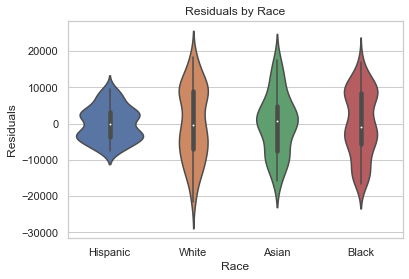

In [48]:
sb.violinplot(data=incData, x="Race", y="Residuals").set(title="Residuals by Race")

The residual plot above illustrates that median values are all concentrated around 0 indicating that the aforementioned fitted linear regression is a good fit, however, due to the length of some of the plots, this indicates a signficant amount variation. Thus we can't in good faith say the model is best fit, so we need to work to alleviate this. 

To achieve a better model, we will utilize a basic machine learning model.

In [62]:
# Obtain mean income and the Income's standard deviation
mean = incData["Income"].mean()
std = incData["Income"].std()

# Standardize Income = (subtract each income value by the mean) / standard deviation
incData["Income_std"] = (incData["Income"] - mean) / std   

# Select the training to data to be 95% of the data
inc_train = incData.sample(frac=0.95)
inc_test = incData.drop(inc_train.index)

# Fit the regression model to see the relationship between standardized income and race and gender
inc_model = smf.ols(formula="Income_std ~ Race + Gender ",data=inc_test).fit()

# Print fitted regression model summary
print(inc_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Income_std   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     16.34
Date:                Thu, 11 May 2023   Prob (F-statistic):           8.23e-06
Time:                        20:37:49   Log-Likelihood:                -19.901
No. Observations:                  23   AIC:                             49.80
Df Residuals:                      18   BIC:                             55.48
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.91

The simple regression model above tests for a relationship between the standard Income and Race and Gender. With p-values below 5% we reject the null hypothesis of no relation between these variables. This data also tells us that 78.4% of the standardized income can be explained by Race and Gender indicating a correlary relationship.